In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv


In [3]:
data_set = pd.read_csv("/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv")

In [4]:
data_set[:2].head()


,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372


In [5]:
data_set['Location'].value_counts()

Location
Al Reem Island                   3668
Jumeirah Village Circle (JVC)    3117
Downtown Dubai                   3003
Khalifa City                     2751
Dubai Marina                     2600
                                 ... 
Mina Al Fajer                       1
Gurfah Area                         1
Oud Al Muteena                      1
Al Lisaili                          1
Al Dar Al Baida                     1
Name: count, Length: 441, dtype: int64

In [6]:
data_set.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
count,7.374200e+04,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73023.000000,73023.000000
mean,1.479250e+05,2.162811,2.650213,2054.053552,88.057754,74.261547,24.918929,55.053133
std,3.069658e+05,1.578155,1.632997,3003.919252,66.534400,72.346767,0.569356,0.653722
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,11.000000,15.175847,43.351928
25%,5.499900e+04,1.000000,2.000000,850.000000,39.977778,30.000000,24.493598,54.607372
50%,9.800000e+04,2.000000,2.000000,1334.000000,71.428571,52.000000,25.078641,55.238209
75%,1.700000e+05,3.000000,3.000000,2130.000000,118.483412,95.000000,25.197978,55.367138
max,5.500000e+07,12.000000,11.000000,210254.000000,2182.044888,2276.000000,25.920310,56.361294


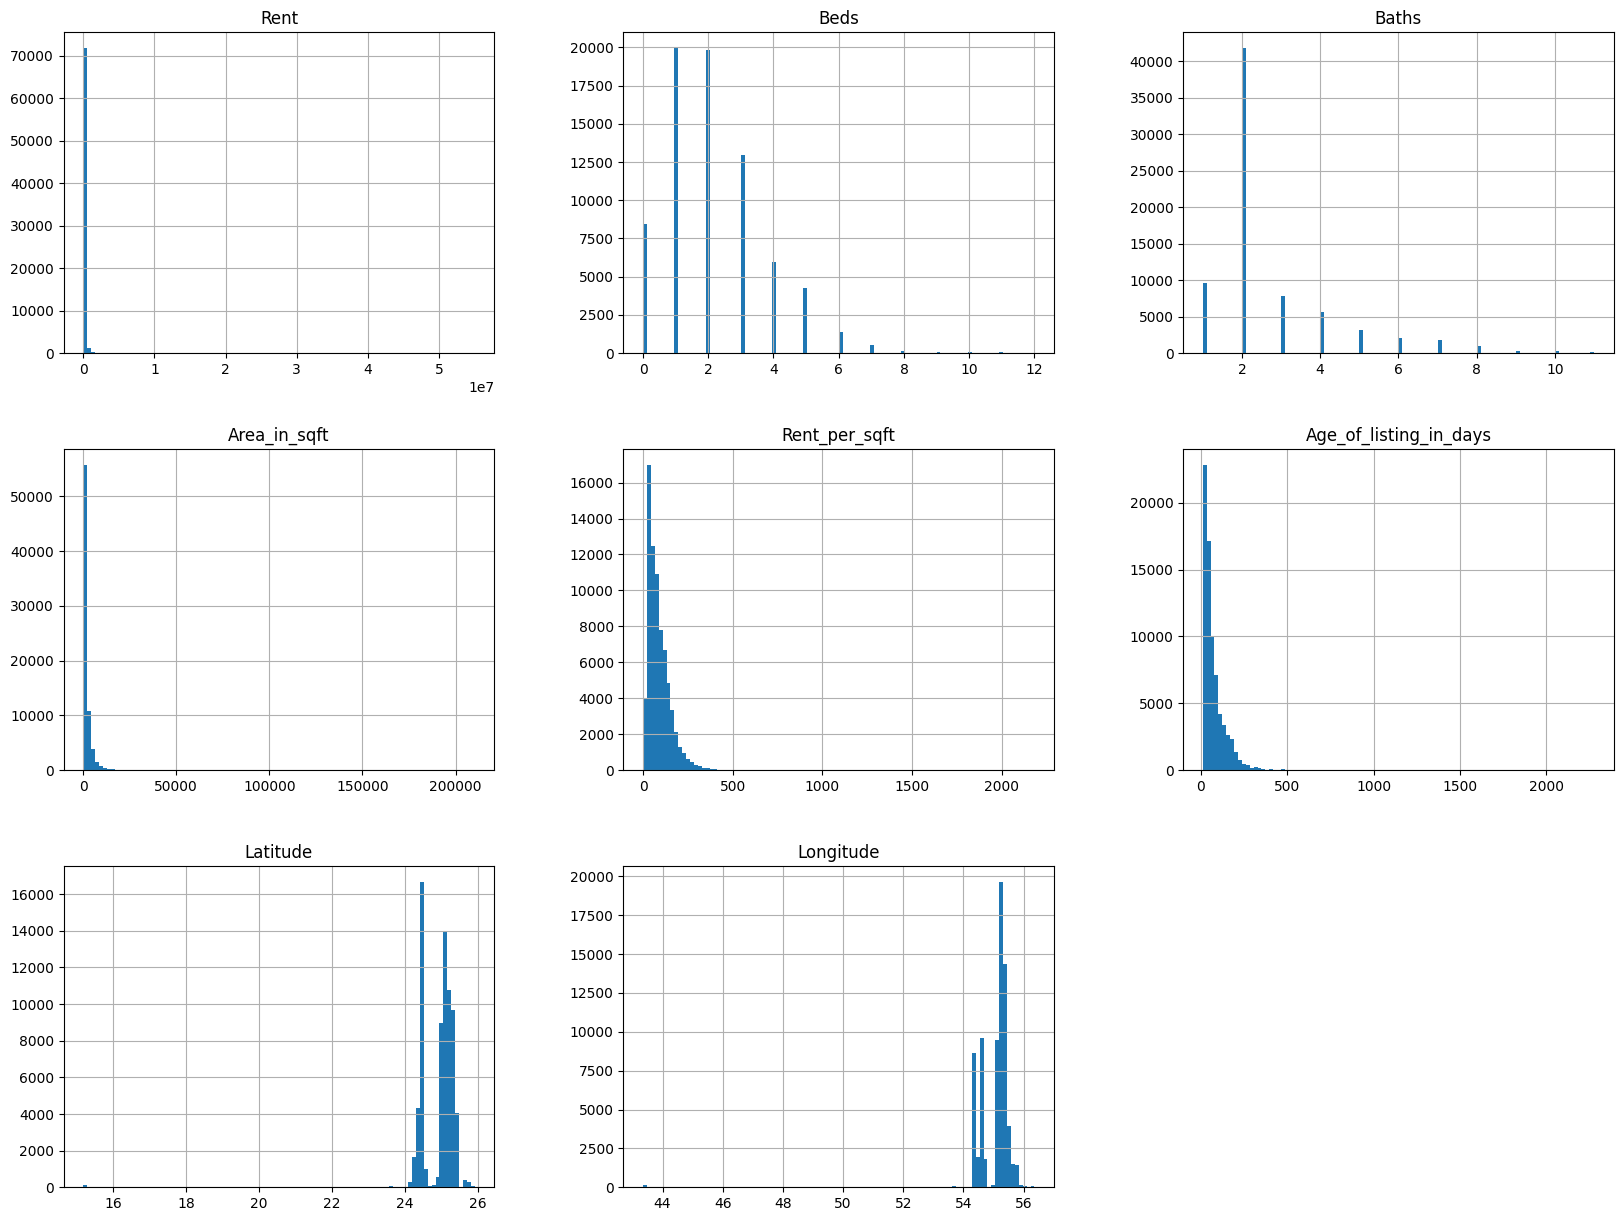

In [7]:
import matplotlib.pyplot as plt
data_set.hist(bins=100,figsize=(20,15))
plt.show()

In [9]:
print(len(train_set))
print(len(test_set))

58993
14749


In [11]:
len(data_set)

73742

<Axes: xlabel='Longitude', ylabel='Latitude'>

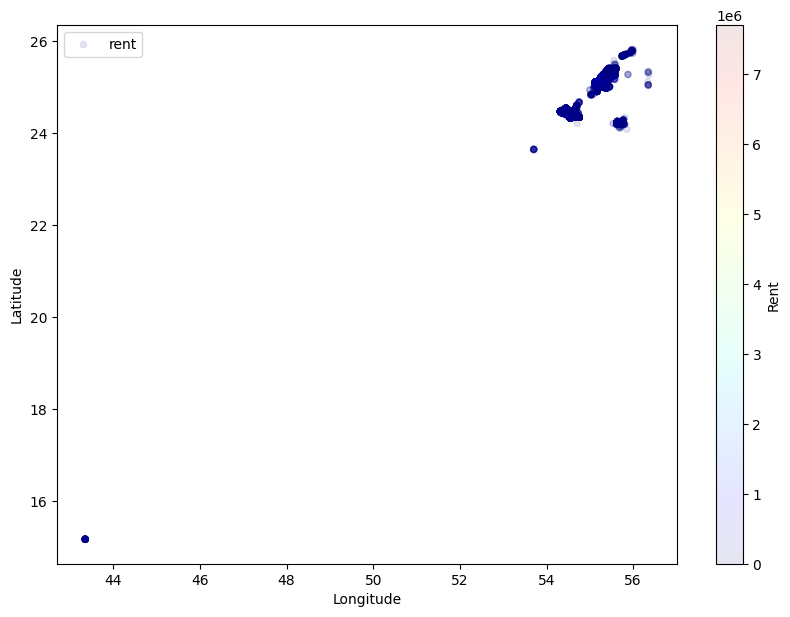

In [12]:
strat_test_set.plot(kind="scatter", x="Longitude", y="Latitude",alpha = 0.1
            ,label="rent",figsize = (10,7),c = "Rent",
              cmap=plt.get_cmap("jet"), colorbar=True
)

In [13]:
data = strat.copy()
data['bed_and_baths'] = data['Baths'] + data['Beds']#toplamak da lineer olarak bağlantısız
data['bed_per_baths'] = data['Beds'] / data['Baths']
#data['years_listing'] = data['Age_of_listing_in_days'] / 360bir şeyi değiştirmez  

In [14]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['Rent'].sort_values(ascending=False)

Rent                      1.000000
Area_in_sqft              0.405517
bed_per_baths             0.372741
Rent_per_sqft             0.348656
Beds                      0.309589
bed_and_baths             0.206338
Baths                     0.080591
Latitude                  0.027837
Longitude                 0.007521
Age_of_listing_in_days    0.000885
Name: Rent, dtype: float64

<Axes: xlabel='Area_in_sqft', ylabel='Rent'>

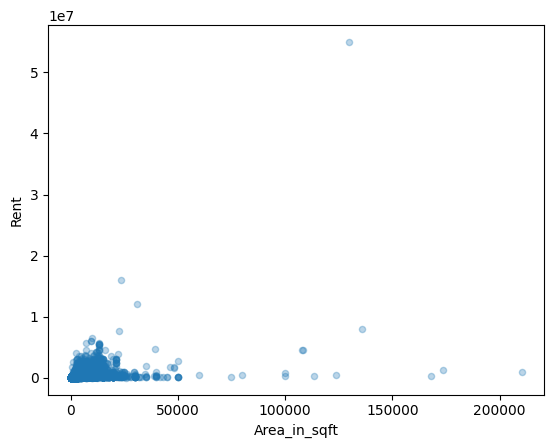

In [15]:
data.plot(kind='scatter',x='Area_in_sqft',y='Rent',alpha = 0.3)

In [21]:
for attr in data.columns:
    if len(data[attr]) != len(data[data[attr].notnull()]):
        print(attr+" there are null values")
    else:
        print("no missing value on "+ attr)

#Tek missing valuelar olan attributelar coğrafi attributelar

no missing value on Address
no missing value on Rent
no missing value on Beds
no missing value on Baths
no missing value on Type
no missing value on Area_in_sqft
no missing value on Rent_per_sqft
no missing value on Rent_category
no missing value on Frequency
no missing value on Furnishing
no missing value on Purpose
no missing value on Posted_date
no missing value on Age_of_listing_in_days
no missing value on Location
no missing value on City
Latitude there are null values
Longitude there are null values
no missing value on bed_and_baths
no missing value on bed_per_baths


In [25]:
print(len(data['Longitude']) , len(data[data['Longitude'].notnull()]))
#Baya bir şey değiştiriyor coğrafi data bu nedenle bence direkt onları yok saymak mantıklı

73742 73023


In [36]:
from sklearn.impute import SimpleImputer
data = data.dropna(subset=["Latitude"])
data = data.dropna(subset=["Longitude"])

In [37]:
data = data.drop('Frequency',axis=1)
data =  data.drop('bed_and_baths',axis=1)
data = data.drop('Purpose',axis=1)
data = data.drop('Posted_date',axis=1)

KeyError: "['Frequency'] not found in axis"

In [43]:
#kategoriz
data_cat = data[['Rent_category','Furnishing','City','Location','Type']]

In [47]:

#data = data.drop('Rent_category',axis=1)
data = data.drop('Furnishing',axis=1)
data = data.drop('City',axis=1)
data = data.drop('Location',axis=1)
data = data.drop('Type',axis=1)

In [48]:
data.head()

,Address,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,bed_per_baths
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,1785,69.467787,45,24.493598,54.407841,0.750000
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,1422,98.452883,44,24.494022,54.607372,0.750000
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,1314,75.342466,31,24.485931,54.600939,0.666667
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,3843,57.246942,57,24.493598,54.407841,0.750000
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,6860,51.020408,65,24.494022,54.607372,0.714286


In [49]:
data_cat.head()

,Rent_category,Furnishing,City,Location,Type
0,Medium,Unfurnished,Abu Dhabi,Al Reem Island,Apartment
1,Medium,Unfurnished,Abu Dhabi,Yas Island,Apartment
2,Medium,Furnished,Abu Dhabi,Al Raha Beach,Apartment
3,High,Unfurnished,Abu Dhabi,Al Reem Island,Penthouse
4,High,Unfurnished,Abu Dhabi,Yas Island,Villa


In [52]:
from sklearn.preprocessing import OneHotEncoder
#ocean_proximity onehot encoded olarak depolanması en mantıklı olandır.
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = data.drop('Address',axis=1)
scaled_data_num = scaler.fit_transform(data)

In [61]:
processed_data_set = pd.DataFrame(scaled_data_num,data_cat_1hot)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit # Stratified bir data split yapılmış olunur.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_set, data_set["Rent_category"]):
  strat_train_set = data_set.loc[train_index]
  strat_test_set = data_set.loc[test_index]